## Exercise01 - Abalone Age Prediction

Your task is to predicting the age of abalone from physical measurements using MLP DL technique with PyTorch.


### 💾 The data: `abalone.csv`

| Name  | Description |
| :----- | :----- |
| Type           | M (Male), F (Female), and I (Infant) |
| LongestShell   | Longest shell measurement |
| Diameter       | perpendicular to length |
| Height         | with meat in shell |
| WholeWeight    | whole abalone |
| ShuckedWeight  | weight of meat |
| VisceraWeight  | gut weight (after bleeding) |
| ShellWeight    | after being dried |
| Rings          | +1.5 gives the age in years |

<div class="alert alert-block alert-danger">
    🚫 <b> Restriction:</b> Please refrain from using <b>ChatGPT</b> to complete this exercise, as doing so may hinder your learning experience.
</div>
    


In [1]:
import pandas as pd

# Read in the data
df = pd.read_csv("data/abalone.csv", header=0)

# Preview the data
df.head(20)

,Type,LongestShell,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
5,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8
6,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20
7,F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,16
8,M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,9
9,F,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320,19


In [2]:
# Start coding here...
# Add as many cells as you like...

In [3]:
from jcopml.plot import plot_missing_value

,missing_value,%
Type,0,0.0
LongestShell,0,0.0
Diameter,0,0.0
Height,0,0.0
WholeWeight,0,0.0
ShuckedWeight,0,0.0
VisceraWeight,0,0.0
ShellWeight,0,0.0
Rings,0,0.0


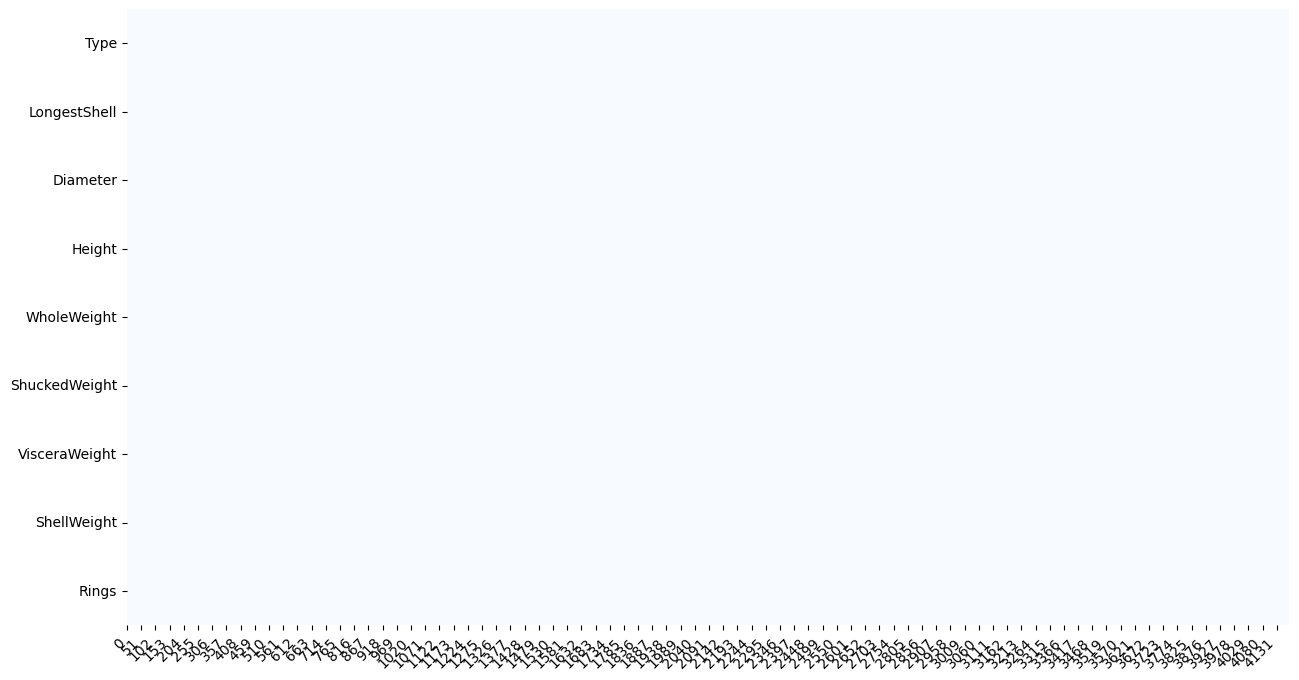

In [4]:
plot_missing_value(df, return_df=True)

In [5]:
# https://ubc-mds.github.io/abalone_age_classification/Project_report_milestone2.html

In [6]:
df.Rings.value_counts()

9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
1       1
26      1
29      1
2       1
25      1
Name: Rings, dtype: int64

In [7]:
df['age_category'] = df['Rings'].apply(lambda x: 1 if x > 11 else 0)

In [8]:
df.head(100)

,Type,LongestShell,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings,age_category
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,1
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,0
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0
...,...,...,...,...,...,...,...,...,...,...
95,M,0.665,0.535,0.195,1.6060,0.5755,0.3880,0.480,14,1
96,M,0.535,0.435,0.150,0.7250,0.2690,0.1385,0.250,9,0
97,M,0.470,0.375,0.130,0.5230,0.2140,0.1320,0.145,8,0
98,M,0.470,0.370,0.130,0.5225,0.2010,0.1330,0.165,7,0


In [9]:
infant_age_category = df[df['Type'] == 'I']['age_category']

In [10]:
print(infant_age_category)

4       0
5       0
16      0
21      0
42      0
       ..
4158    0
4163    0
4164    0
4165    0
4166    0
Name: age_category, Length: 1342, dtype: int64


In [11]:
infant_age_category.value_counts()

0    1249
1      93
Name: age_category, dtype: int64

In [12]:
df = df.drop(columns='Rings')
df.head(10)

,Type,LongestShell,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,age_category
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,1
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,0
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,0
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,0
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,0
5,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,0
6,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,1
7,F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,1
8,M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,0
9,F,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320,1


# Data splitting

In [13]:
from sklearn.model_selection import train_test_split

X = df.drop(columns='age_category')
y = df.age_category.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3341, 8), (836, 8), (3341,), (836,))

# Process Data 

In [14]:
X_train.columns.difference(['Type'])

Index(['Diameter', 'Height', 'LongestShell', 'ShellWeight', 'ShuckedWeight',
       'VisceraWeight', 'WholeWeight'],
      dtype='object')

In [15]:
from sklearn.compose import ColumnTransformer
from jcopml.pipeline import num_pipe, cat_pipe

preprocessor = ColumnTransformer([
    ('numeric', num_pipe(), X_train.columns.difference(['Type'])),
    ('categoric', cat_pipe(encoder='onehot'), ['Type'])
])

X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

X_train

array([[0.45 , 0.175, 0.555, ..., 0.   , 0.   , 1.   ],
       [0.375, 0.1  , 0.51 , ..., 0.   , 1.   , 0.   ],
       [0.315, 0.115, 0.415, ..., 0.   , 0.   , 1.   ],
       ...,
       [0.22 , 0.065, 0.3  , ..., 0.   , 1.   , 0.   ],
       [0.45 , 0.155, 0.58 , ..., 1.   , 0.   , 0.   ],
       [0.505, 0.205, 0.67 , ..., 1.   , 0.   , 0.   ]])

In [16]:
X_train

array([[0.45 , 0.175, 0.555, ..., 0.   , 0.   , 1.   ],
       [0.375, 0.1  , 0.51 , ..., 0.   , 1.   , 0.   ],
       [0.315, 0.115, 0.415, ..., 0.   , 0.   , 1.   ],
       ...,
       [0.22 , 0.065, 0.3  , ..., 0.   , 1.   , 0.   ],
       [0.45 , 0.155, 0.58 , ..., 1.   , 0.   , 0.   ],
       [0.505, 0.205, 0.67 , ..., 1.   , 0.   , 0.   ]])

# Dataset & Dataloader 

In [17]:
import torch
from torch import nn, optim
import numpy as np

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

In [18]:
X_train = torch.FloatTensor(X_train).to(device)
X_test = torch.FloatTensor(X_test).to(device)
y_train = torch.LongTensor(y_train).to(device)
y_test = torch.LongTensor(y_test).to(device)

In [19]:
from torch.utils.data import DataLoader, TensorDataset

train_set = TensorDataset(X_train, y_train)
trainloader = DataLoader(train_set, batch_size=64, shuffle=True)

test_set = TensorDataset(X_test, y_test)
testloader = DataLoader(test_set, batch_size=64)

# Training Prep -> MCO 

In [20]:
X_train.shape

torch.Size([3341, 10])

In [21]:
model = nn.Sequential(
    nn.Linear(10, 16),
    nn.ReLU(),
    nn.Linear(16, 8),
    nn.ReLU(),
    nn.Linear(8, 4),
    nn.ReLU(),
    nn.Linear(4, 2),
    nn.LogSoftmax(1)
).to(device)
criterion = nn.NLLLoss()
optimizer = optim.AdamW(model.parameters(), lr=0.001)

In [22]:
epochs = 1000
train_cost, test_cost = [], []
for i in range(epochs):
    model.train()
    cost = 0
    for feature, target in trainloader:
        output = model(feature) #feedforward
        loss = criterion(output, target) # calculate loss
        loss.backward() # backprop

        optimizer.step() #update weight
        optimizer.zero_grad()
        
        cost += loss.item() * feature.shape[0]
    
    train_cost.append(cost / len(train_set))
    
    with torch.no_grad():
        model.eval()
        cost = 0
        for feature, target in testloader:
            output = model(feature) # feedforward
            loss = criterion(output, target)
            
            cost += loss.item() * feature.shape[0]
        test_cost.append(cost / len(test_set))
        
    print(f'\rEpoch: {i+1}/{epochs:4} | train_cost: {train_cost[-1]:.4f} | test_cost: {test_cost[-1]:.4f}', end=" ")

Epoch: 1000/1000 | train_cost: 0.3497 | test_cost: 0.3526 

In [23]:
import matplotlib.pyplot as plt

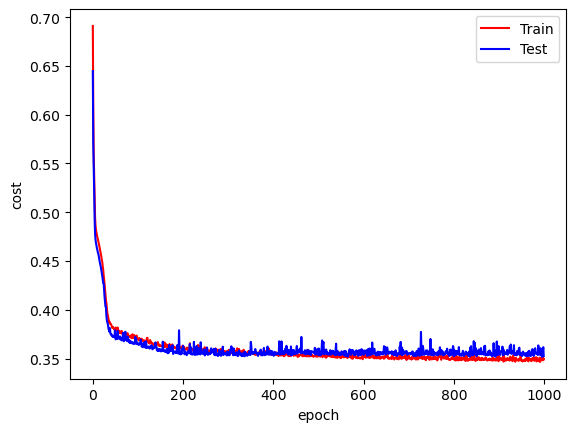

In [24]:
plt.plot(train_cost, 'r-', label='Train')
plt.plot(test_cost, 'b-', label='Test')
plt.xlabel('epoch'); plt.ylabel('cost'); plt.legend();

# Predict 

In [25]:
with torch.no_grad():
    model.eval()
    output=model(X_test)

In [26]:
pred = output.argmax(1)
pred

tensor([0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,

# Accuracy 

In [27]:
acc = (y_test == pred).to(torch.float32).mean()
acc

tensor(0.8445)